In [167]:
import numpy as np
import quantrautil as q
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from datetime import date

# tick = yf.Ticker("AAPL")
# data = tick.history(period='max')
today = date.today()
formed_date = today.strftime("%Y-%m-%d")
# data = stock.loc['2010-01-01':formed_date]
# data.tail()
data = q.get_data('MSFT','2000-1-1', formed_date)
print(data.tail())

[*********************100%***********************]  1 of 1 downloaded
              Open    High     Low   Close  Adj Close    Volume Source
Date                                                                  
2019-09-30  138.05  139.22  137.78  139.03     139.03  17280900  Yahoo
2019-10-01  139.66  140.25  137.00  137.07     137.07  21466600  Yahoo
2019-10-02  136.25  136.37  133.58  134.65     134.65  30521700  Yahoo
2019-10-03  134.95  136.75  133.22  136.28     136.28  24132900  Yahoo
2019-10-04  136.75  138.25  136.42  138.12     138.12  22897700  Yahoo


In [168]:
# Features construction 
data['Open-Close'] = (data.Open - data.Close)/data.Open
data['High-Low'] = (data.High - data.Low)/data.Low
data['percent_change'] = data['Adj Close'].pct_change()
data['std_5'] = data['percent_change'].rolling(5).std()
data['ret_5'] = data['percent_change'].rolling(5).mean()
data.dropna(inplace=True)

# X is the input variable
X = data[['Open-Close', 'High-Low', 'std_5', 'ret_5', 'Volume']]

# Y is the target or output variable
y = np.where(data['Adj Close'].shift(-1) > data['Adj Close'], 1, -1)
print(X.shape)
print(y.shape)

(4966, 5)
(4966,)


In [169]:
# Total dataset length
dataset_length = data.shape[0]

# Training dataset length
split = int(dataset_length * 0.75)

In [170]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3724, 5) (1242, 5)
(3724,) (1242,)


In [171]:
clf = RandomForestClassifier(random_state=5)

# Create the model on train dataset
model = clf.fit(X_train, y_train)
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  52.012882447665056


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [172]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

          -1       0.49      0.59      0.53       581
           1       0.56      0.46      0.51       661

    accuracy                           0.52      1242
   macro avg       0.52      0.52      0.52      1242
weighted avg       0.53      0.52      0.52      1242



In [188]:
data['strategy_returns'] = data['percent_change'].shift(-1) * model.predict(X)
predictions = model.predict(X)

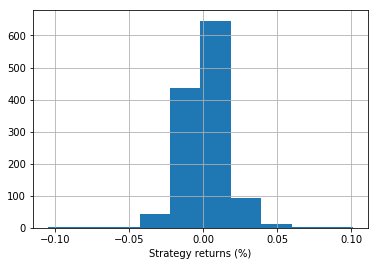

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt
data.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()

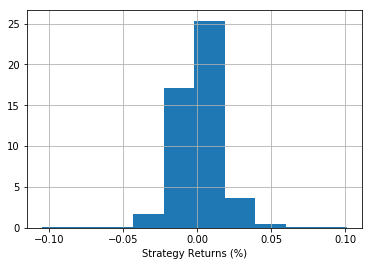

In [194]:
plt.hist(data.strategy_returns[split:],density=1, bins=10) 
plt.xlabel('Strategy Returns (%)')
plt.grid()
plt.show()

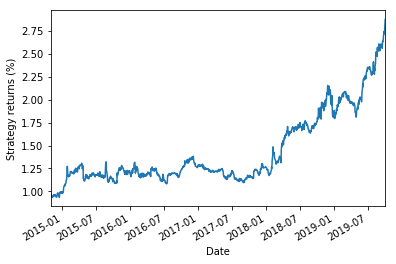

In [175]:
(data.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.show()

In [189]:
predictions[-1]

-1

In [ ]:
print('Parameters currently in use:\n')
pprint(rf.get_params())